https://www.oreilly.com/learning/pivot-tables

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# shell command to download the data:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

births = pd.read_csv('births.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0  1646k      0 --:--:-- --:--:-- --:--:-- 1646k


In [5]:
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [6]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


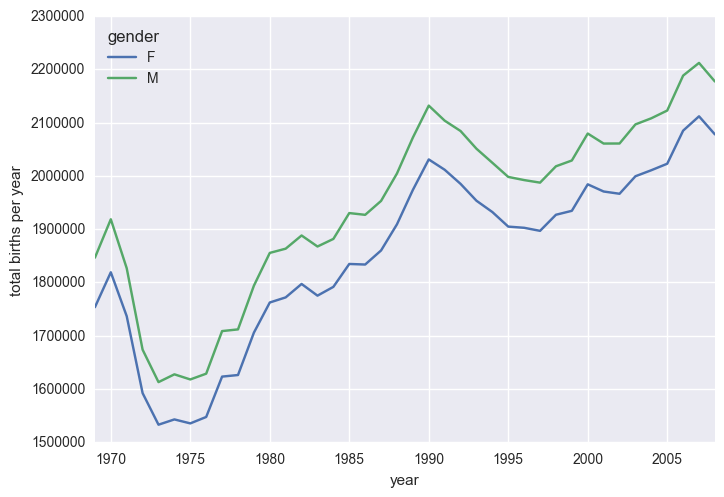

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [8]:
# Some data is mis-reported; e.g. June 31st, etc.
# remove these outliers via robust sigma-clipping
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.7413 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [9]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [10]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year +
													100 * births.month +
													births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

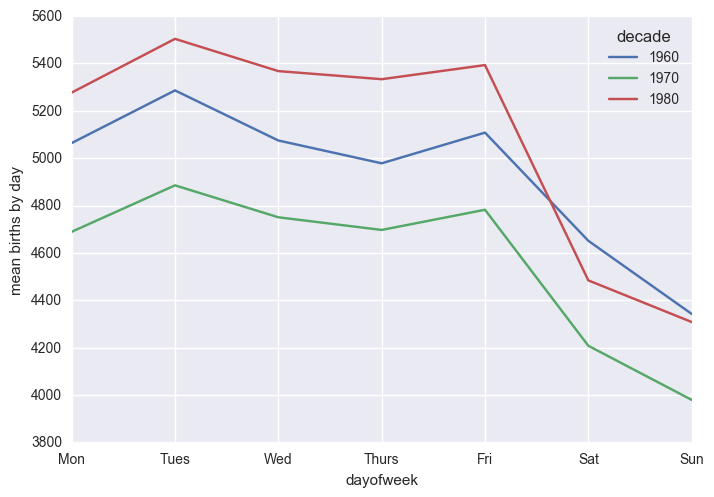

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
								columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [12]:
# Choose a leap year to display births by date
dates = [pd.datetime(2012, month, day)
		for (month, day) in zip(births['month'], births['day'])]

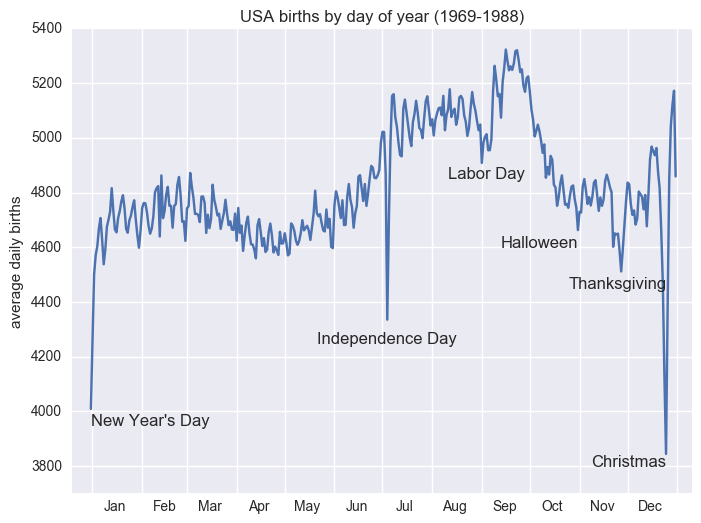

In [13]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
births.pivot_table('births', dates).plot(ax=ax)

# Label the plot
ax.text('2012-1-1', 3950, "New Year's Day")
ax.text('2012-7-4', 4250, "Independence Day", ha='center')
ax.text('2012-9-4', 4850, "Labor Day", ha='center')
ax.text('2012-10-31', 4600, "Halloween", ha='right')
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center')
ax.text('2012-12-25', 3800, "Christmas", ha='right')
ax.set(title='USA births by day of year (1969-1988)',
	ylabel='average daily births',
	xlim=('2011-12-20','2013-1-10'),
	ylim=(3700, 5400));

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));